In [16]:
import matplotlib as mpl
mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno

BuRd = rcmap(cm.RdBu)

import hickle as hkl

#source_dirc=svintp.source
#exp_dirc=["aqua_2m/","aqua_20m/","land_rec20m/"]

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

# dirc=sys.argv

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#source='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/land_realtest/'
source_dir='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/'
source = source_dir+'land_zonalzeroqflux'+'/'
            
make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/")
make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/compensate/")

fig_dest="/project2/tas1/pragallva/Fall_quarter_2017/figures/compensate/"

# dirc=sys.argv
#title=dirc[1]+"  "+dirc[2].split("_")[0]+"m"+"  "+dirc[2].split("_")[1]
#title =dirc[1]+"  "+dirc[2]

# second_part=dirc[2].split("_")
# if len(second_part)>1 :
#     title = dirc[1]+"  "+second_part[0]+"  "+second_part[1]
# else :
#     title = dirc[1]+"  "+second_part[0]

div =load(source+"div_flux_dict.hkl")
flux=load(source+"flux_interp_dict.hkl")

NE=div['TOA_d']+div['SFC_u']-div['dhdt']
NE1=div['SE']+div['MM']+div['TE']
latns=div['latn']

m=range(13)
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def add(y):
   y1 = np.append(y,y[:,0,np.newaxis],axis=1)
   return y1

def add2(y):
   y1 = np.append(y[-1],y)
   return y1

/home/pragallva/Project1/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [17]:
ls /project2/tas1/pragallva/Fall_quarter_2017/post_process_data/

aqua_20m/             land_real/         land_tracmipqflux/
aqua_20_season/       land_realnoqflux/  land_zeroqflux/
aqua_2m/              land_realqflux1/   land_zonalnoq/
-f_/                  land_realqflux2/   land_zonalnoqflux/
land_0080/            land_realqflux3/   land_zonalqflux/
land_20_2080/         land_realqflux4/   land_zonaltracmipqflux/
land_3080_0030/       land_realqflux5/   land_zonalzeroqflux/
land_3560_op/         land_realqflux6/   Ruth_full/
land_myzonalnoqflux/  land_realtest/
land_myzonalqflux/    land_rec20m/


In [18]:
ne=div['TOA_d']+div['SFC_u']-div['dhdt']
te=div['TE'] ; se=div['SE']; mm=ne-te-se 

In [19]:
NE=flux['TOA_d']+flux['SFC_u']-flux['dhdt']
TE=flux['TE'] ; SE=flux['SE']; MM=NE-SE[1:-1]-TE[1:-1] #flux['MM'];

6


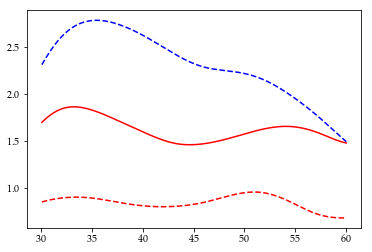

In [33]:
% matplotlib inline
r=((latns>=30) & (latns<=60))
m=6
# py.axhline(0)
py.plot(latns[r],TE[r,m],'r-')
py.plot(latns[r],TE[r,m+1],'r--')
py.plot(latns[r],TE[r,m-1],'b--')
# py.plot(latns[r],te[r,m]/10,'r--')
# py.plot(latns[r],TE[r,m+1],'r--')
#py.axvline(storm_pos_N[m])
# py.axvline(storm_pos_N[m+1])
print m
py.show()

In [20]:
from scipy.interpolate import interp1d
def find_zero(div,N=1):
  zero_loc = np.zeros(12)
  for m in range(0,12):
        if N==1 :
         l_range=((latns>=30) & (latns<=50))
#          if m==7 :
#             l_range=((latns>=46) & (latns<=55))
#          if m==8 :
#             l_range=((latns>=35) & (latns<=50))
#          if m==9 :
#             l_range=((latns>=35) & (latns<=50))
        else    :
         l_range=((latns>=-60) & (latns<=-30))          
        interpolation_function = interp1d(div[l_range,m],latns[l_range],kind='cubic')
        zero_loc[m]=interpolation_function(0)
  return zero_loc

storm_pos_N=find_zero(te,1)
storm_pos_S=find_zero(te,-1)

ValueError: A value in x_new is below the interpolation range.

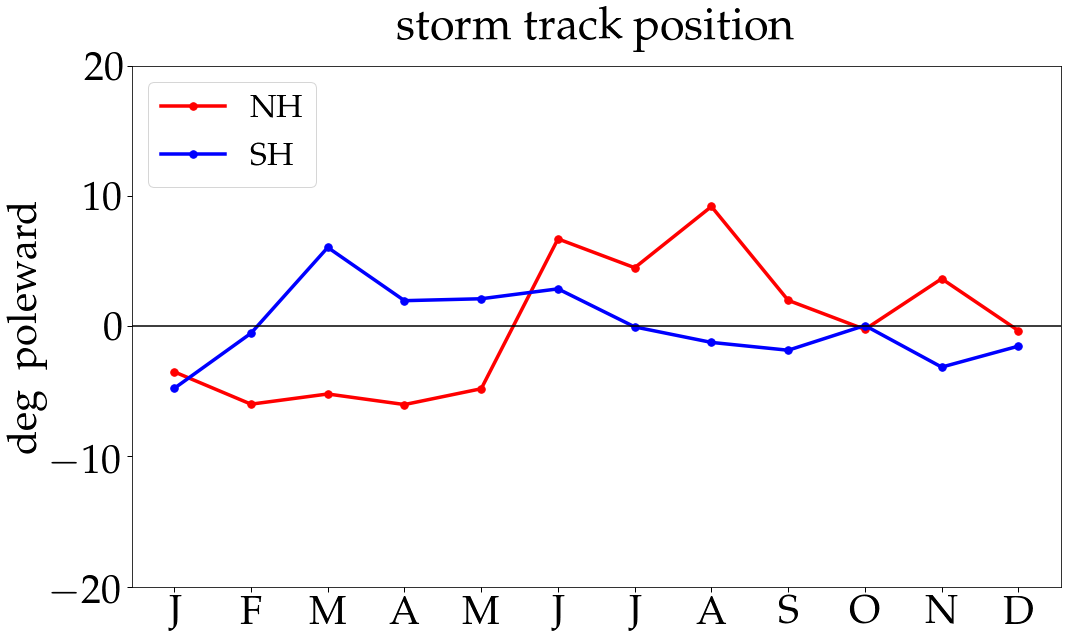

In [ ]:
% matplotlib inline
fig=py.figure(figsize=(15, 9))
mticks = ['J','F','M','A','M','J','J','A','S','O','N','D']
m=range(12)

import numpy.ma as ma
storm_pos_S=ma.masked_where((storm_pos_S >= -20) | (storm_pos_S <= -75), storm_pos_S)
storm_pos_N=ma.masked_where((storm_pos_N >= 70) | (storm_pos_N <= 20), storm_pos_N)

py.plot((storm_pos_N-storm_pos_N.mean()),'r.-',linewidth=3.5,markersize=15, label="NH")
py.plot(-(storm_pos_S-storm_pos_S.mean()),'b.-',linewidth=3.5,markersize=15, label="SH")
py.axhline(0,color='k')
py.tick_params(labelsize=40,size=5,width=1)
py.ylabel("deg \\  poleward", fontsize=40)
py.legend(loc=2,fontsize=32)
py.xticks(m, mticks)
py.ylim(-20,20)
Y=np.arange(-8,8+1,4)
# py.yticks(Y)
title='storm track position'
py.title(title,fontsize=45,y=1.04)
py.tight_layout()

make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/position/")
fig_dest1="/project2/tas1/pragallva/Fall_quarter_2017/figures/position/"

# py.savefig(fig_dest1+'position_realtracmipqflux.pdf')
py.show()

In [65]:
storm_pos_S=ma.masked_where((storm_pos_S >= -) | (storm_pos_S <= -65), storm_pos_S)
storm_pos_S

masked_array(data = [-38.80313109017851 -37.66786385270199 -47.15711723107033
 -44.60449502374798 -- -44.64164639079077 -45.23241112468088
 -38.57158597271734 -39.54047967778757 -40.54186326585256
 -40.41156417094072 -40.62263070532111],
             mask = [False False False False  True False False False False False False False],
       fill_value = 1e+20)

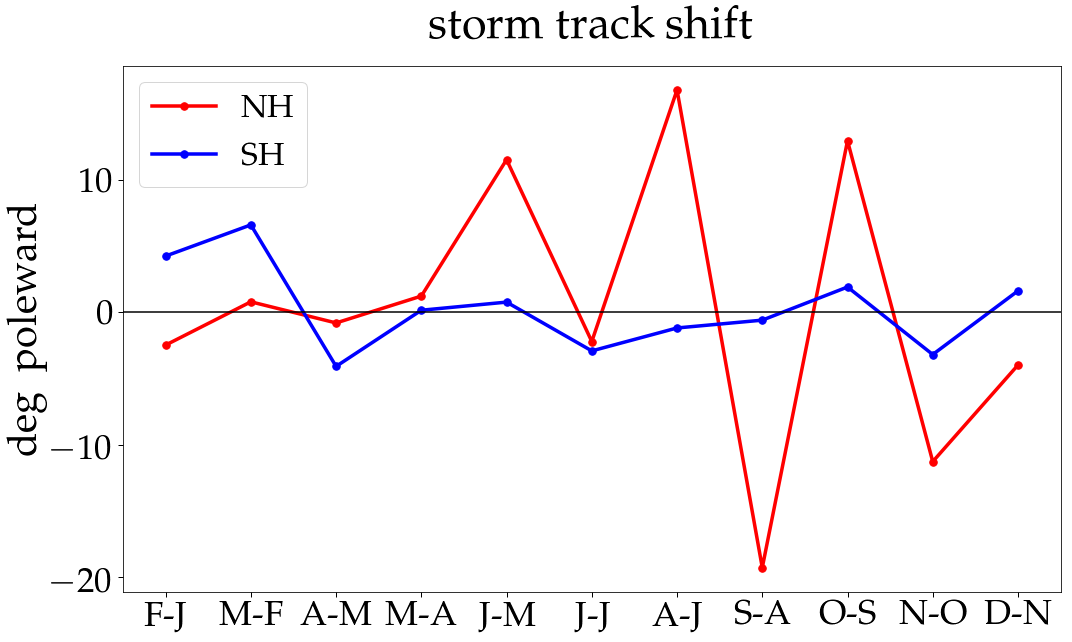

In [95]:
def d(x) :
    return x[1:]-x[:-1]
mticks = ['F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N']
m=range(11)
fig=py.figure(figsize=(15, 9))
py.plot(d(storm_pos_N),'r.-',linewidth=3.5,markersize=15,label='NH')
py.plot(-d(storm_pos_S),'b.-',linewidth=3.5,markersize=15,label='SH')
py.axhline(0,color='k')
py.tick_params(labelsize=35,size=5,width=1)
py.ylabel("deg \\  poleward", fontsize=40)
py.legend(loc=2,fontsize=32)
py.xticks(m, mticks)
# py.ylim(-6,6)
title='storm track shift'
py.title(title,fontsize=45,y=1.04)
py.tight_layout()

make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/position/")
fig_dest1="/project2/tas1/pragallva/Fall_quarter_2017/figures/position/"

# py.savefig(fig_dest1+'shift_realtracmipqflux.pdf')
py.show()

0


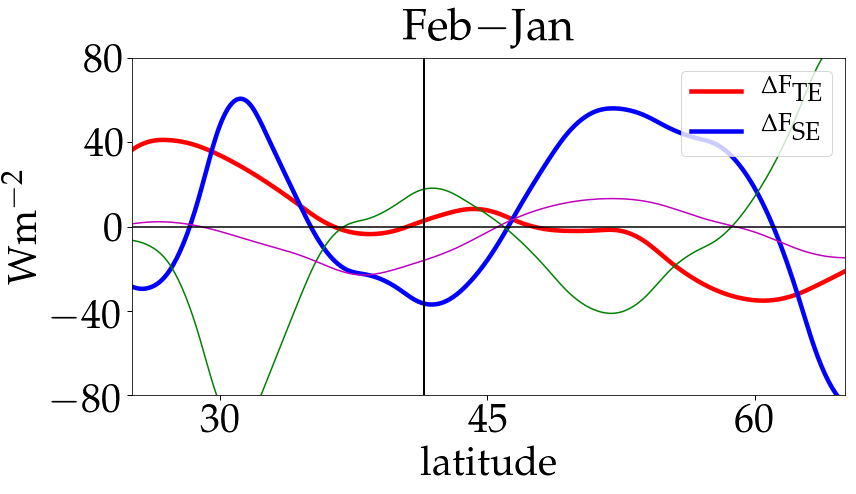

In [37]:
%matplotlib inline
def D(x,m):
    return x[r,m+1]-x[r,m]    

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan']
r=((latns>20) & (latns<65))
X=np.arange(30, 61, 15)
m=0; print m
fig=py.figure(figsize=(12, 7))
py.plot(latns[r],D((te),m),'r-',linewidth=4.5,label=r"$\Delta \textrm{F}_{\textrm{TE}}$")
py.plot(latns[r],D((se),m),'b-',linewidth=4.5,label=r"$\Delta \textrm{F}_{\textrm{SE}}$")
# py.plot(latns[r],te[r,m],'k--')
# py.plot(latns[r],te[r,m+1],'k-')
py.plot(latns[r],D(mm,m),'g-')
py.plot(latns[r],D(ne,m),'m-')

py.axhline(0, color='k',linewidth=1.5)
py.axvline(storm_pos_N[m], color='k',linewidth=2.0)
py.tick_params(labelsize=40,size=5,width=1)


x1=np.min(latns[r]); x2=np.max(latns[r])
py.xlim(x1+5,x2)
py.xticks(X)
y1=-80; y2= 80
Y=np.arange(y1,y2+1,40)
py.yticks(Y)
py.ylim(y1,y2)

py.xlabel("latitude", fontsize=40)
py.ylabel(r'$\textrm{W}\textrm{m}^{-2}$',fontsize=40)
py.legend(loc=1,fontsize=25)
py.subplots_adjust(left=0.12, right=0.92, top=0.91, bottom=0.13)
title=months[m+1]+"-"+months[m]
py.title(months[m+1]+r"$\mathrm{-}$"+months[m],fontsize=45,y=1.04)
# py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10)
py.tight_layout()
#py.savefig(fig_dest+title+'_realnoqflux.pdf')
py.show()


8


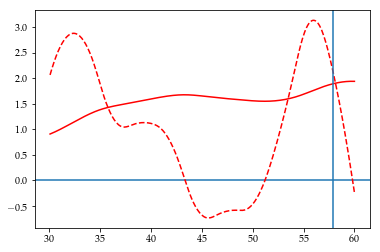

In [66]:
r=((latns>30) & (latns<60))
m=8
py.axhline(0)
py.plot(latns[r],TE[r,m],'r-')
py.plot(latns[r],te[r,m]/10,'r--')
# py.plot(latns[r],TE[r,m+1],'r--')
py.axvline(storm_pos_N[m])
# py.axvline(storm_pos_N[m+1])
print m

# The code below takes the average of 7 different equilbrated MSE fluxes and averages them out

In [1]:
import matplotlib as mpl
mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno

BuRd = rcmap(cm.RdBu)

import hickle as hkl

#source_dirc=svintp.source
#exp_dirc=["aqua_2m/","aqua_20m/","land_rec20m/"]

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

        
m=range(13)
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def add(y):
   y1 = np.append(y,y[:,0,np.newaxis],axis=1)
   return y1

def add2(y):
   y1 = np.append(y[-1],y)
   return y1

In [2]:
source_dir='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/'
fn=np.arange(1,7,1)
source=[]
for i in range(6):
    source.append(source_dir+'land_realqflux'+str(fn[i])+'/')
source.append(source_dir+'land_realtest/')


div=[]; flux=[]; ne=[]; ne1=[]; te=[]; se=[]; mm=[]
NE=[]; NE1=[]; SE=[]; TE=[]; MM=[]
for i in range(6):
    div.append(load(source[i]+"div_flux_dict.hkl"))
    flux.append(load(source[i]+"flux_interp_dict.hkl"))

    ne.append(div[i]['TOA_d']+div[i]['SFC_u']-div[i]['dhdt'])
    ne1.append(div[i]['SE']+div[i]['MM']+div[i]['TE'])
    te.append(div[i]['TE']) ; se.append(div[i]['SE']);  mm.append(div[i]['MM'])
    
    NE.append(flux[i]['TOA_d']+flux[i]['SFC_u']-flux[i]['dhdt'])
    NE1.append(flux[i]['SE']+flux[i]['MM']+flux[i]['TE'])    
    TE.append(flux[i]['TE']) ; SE.append(flux[i]['SE']); MM.append(flux[i]['MM'])

latns=flux[0]['latn']
latnr=flux[0]['latnr']

In [3]:
def M(x):
    return (np.asarray(x)).mean(axis=0)
ne=M(ne); se=M(se); te=M(te); #mm=M(mm)
mm=ne-se-te
NE=M(NE); SE=M(SE);TE=M(TE); #MM=M(MM)
MM=(NE-SE[1:-1,:]-TE[1:-1,:])

In [4]:
NE.shape

(1739, 12)

In [5]:
te.shape

(1741, 12)

In [6]:
from scipy.interpolate import interp1d
def find_zero(div,N=1):
  zero_loc = np.zeros(12)
  for m in range(0,12):
        if N==1 :
         l_range=((latns>=30) & (latns<=60)) 
        else    :
         l_range=((latns>=-60) & (latns<=-30))          
        interpolation_function = interp1d(div[l_range,m],latns[l_range],kind='cubic')
        zero_loc[m]=interpolation_function(0)
  return zero_loc

storm_pos_N=find_zero(te,1)
storm_pos_S=find_zero(te,-1)

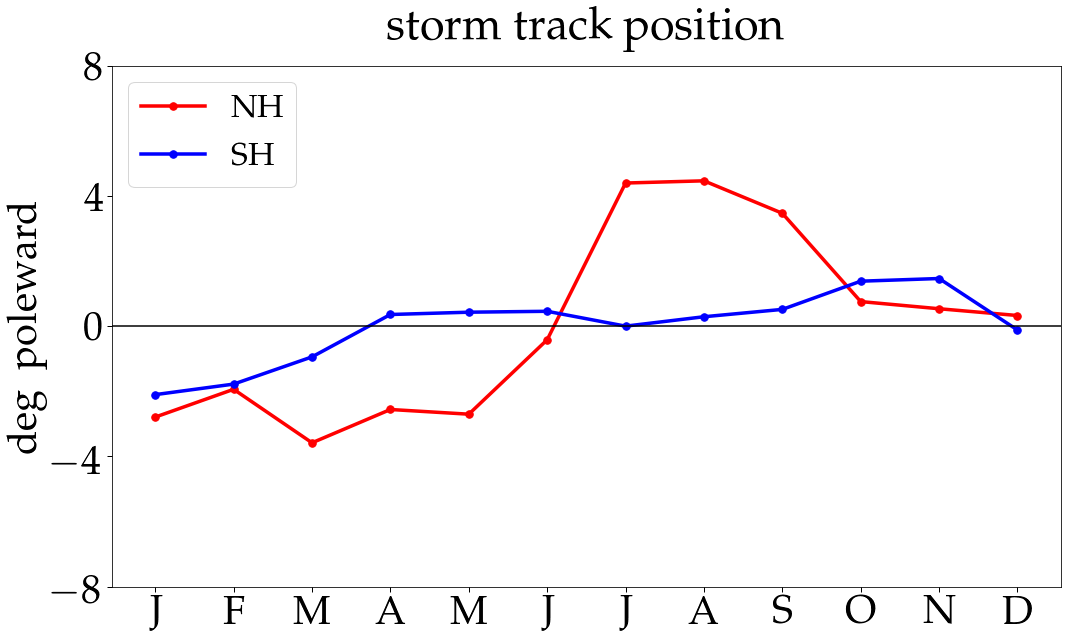

In [7]:
% matplotlib inline
fig=py.figure(figsize=(15, 9))
mticks = ['J','F','M','A','M','J','J','A','S','O','N','D']
m=range(12)
py.plot((storm_pos_N-storm_pos_N.mean()),'r.-',linewidth=3.5,markersize=15, label="NH")
py.plot(-(storm_pos_S-storm_pos_S.mean()),'b.-',linewidth=3.5,markersize=15, label="SH")
py.axhline(0,color='k')
py.tick_params(labelsize=40,size=5,width=1)
py.ylabel("deg \\  poleward", fontsize=40)
py.legend(loc=2,fontsize=32)
py.xticks(m, mticks)
py.ylim(-8,8)
Y=np.arange(-8,8+1,4)
py.yticks(Y)
title='storm track position'
py.title(title,fontsize=45,y=1.04)
py.tight_layout()

make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/position/")
fig_dest1="/project2/tas1/pragallva/Fall_quarter_2017/figures/position/"

#py.savefig(fig_dest1+'position_real_qflux.pdf')
py.show()

In [8]:
storm_pos_N.mean()

45.5280362880384

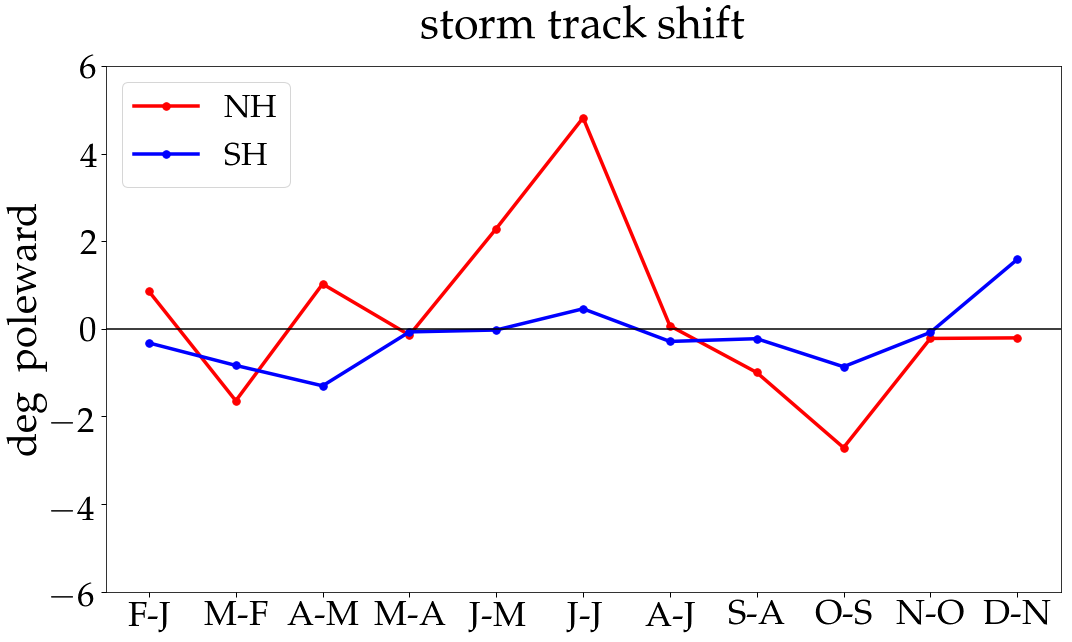

In [9]:
def d(x) :
    return x[1:]-x[:-1]
mticks = ['F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N']
m=range(11)
fig=py.figure(figsize=(15, 9))
py.plot(d(storm_pos_N),'r.-',linewidth=3.5,markersize=15,label='NH')
py.plot(d(storm_pos_S),'b.-',linewidth=3.5,markersize=15,label='SH')
py.axhline(0,color='k')
py.tick_params(labelsize=35,size=5,width=1)
py.ylabel("deg \\  poleward", fontsize=40)
py.legend(loc=2,fontsize=32)
py.xticks(m, mticks)
py.ylim(-6,6)
title='storm track shift'
py.title(title,fontsize=45,y=1.04)
py.tight_layout()

make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/position/")
fig_dest1="/project2/tas1/pragallva/Fall_quarter_2017/figures/position/"

#py.savefig(fig_dest1+'shift_real_qflux.pdf')
py.show()

# Plot compensation

0


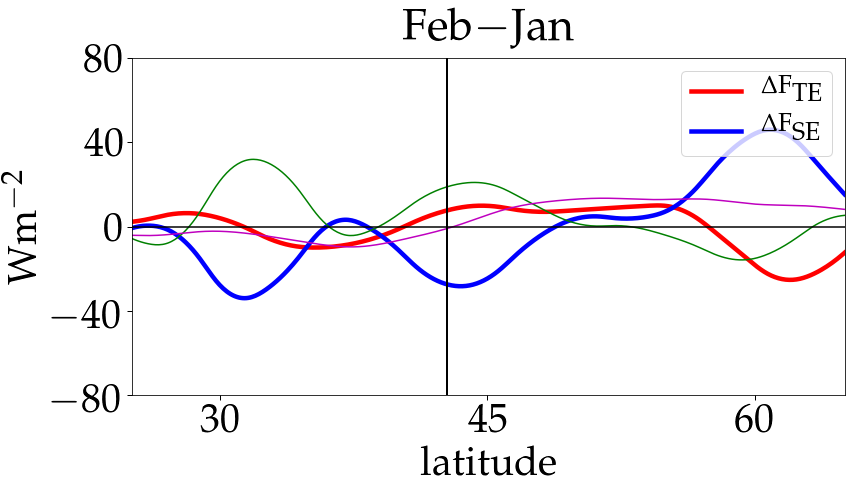

In [10]:
%matplotlib inline
def D(x,m):
    return x[r,m+1]-x[r,m]    

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan']
r=((latns>20) & (latns<65))
X=np.arange(30, 61, 15)
m=0; print m
fig=py.figure(figsize=(12, 7))
py.plot(latns[r],D((te),m),'r-',linewidth=4.5,label=r"$\Delta \textrm{F}_{\textrm{TE}}$")
py.plot(latns[r],D((se),m),'b-',linewidth=4.5,label=r"$\Delta \textrm{F}_{\textrm{SE}}$")
# py.plot(latns[r],te[r,m],'k--')
# py.plot(latns[r],te[r,m+1],'k-')
py.plot(latns[r],D(mm,m),'g-')
py.plot(latns[r],D(ne,m),'m-')

py.axhline(0, color='k',linewidth=1.5)
py.axvline(storm_pos_N[m], color='k',linewidth=2.0)
py.tick_params(labelsize=40,size=5,width=1)


x1=np.min(latns[r]); x2=np.max(latns[r])
py.xlim(x1+5,x2)
py.xticks(X)
y1=-80; y2= 80
Y=np.arange(y1,y2+1,40)
py.yticks(Y)
py.ylim(y1,y2)

py.xlabel("latitude", fontsize=40)
py.ylabel(r'$\textrm{W}\textrm{m}^{-2}$',fontsize=40)
py.legend(loc=1,fontsize=25)
py.subplots_adjust(left=0.12, right=0.92, top=0.91, bottom=0.13)
title=months[m+1]+"-"+months[m]
py.title(months[m+1]+r"$\mathrm{-}$"+months[m],fontsize=45,y=1.04)
# py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10)
py.tight_layout()
#py.savefig(fig_dest+title+'_real_qflux.pdf')
py.show()


# Storm track shift decomposition

In [7]:
def find_zero(div,N=1):
  zero_loc = np.zeros(13)
  for m in range(0,13):
        if N==1 :
          l_range=((latns>35) & (latns<60))
          if (m>=6) & (m<=10) :
            l_range=((latns>42) & (latns<60))
        else    :
         l_range=((latns>=-60) & (latns<=-35))          
        interpolation_function = interp1d(div[l_range,m],latns[l_range],kind='cubic')
        zero_loc[m]=interpolation_function(0)
  return zero_loc

# storm_pos_N=find_zero(te,1)
# storm_pos_S=find_zero(te,-1)

In [8]:
SE_change=np.zeros((len(latns),13))
MM_change=np.zeros((len(latns),13))
TE_change=np.zeros((len(latns),13))
NE_change=np.zeros((len(latns),13))

def calculate_shift_just_by_adding_individual_flux_divergences():
    
    div_SE=np.append(se,se[:,0,np.newaxis],axis=1)
    div_MM=np.append(mm,mm[:,0,np.newaxis],axis=1)
    div_TE=np.append(te,te[:,0,np.newaxis],axis=1)
    div_NE=np.append(ne,ne[:,0,np.newaxis],axis=1)
    
    for month in range(0,12):

        del_div_SE1=div_SE[:,month+1]-div_SE[:,month]
        del_div_MM1=div_MM[:,month+1]-div_MM[:,month]
        del_div_TE1=div_TE[:,month+1]-div_TE[:,month]
        del_div_NE1=div_NE[:,month+1]-div_NE[:,month]
        
        SE_change[:,month+1]=te[:,month]-del_div_SE1
        MM_change[:,month+1]=te[:,month]-del_div_MM1
        TE_change[:,month+1]=te[:,month]+del_div_TE1
        NE_change[:,month+1]=te[:,month]+del_div_NE1

    SE_change[:,0]=SE_change[:,12]
    TE_change[:,0]=TE_change[:,12]
    MM_change[:,0]=MM_change[:,12]
    NE_change[:,0]=NE_change[:,12]
    return SE_change, MM_change, TE_change, NE_change

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences()

0


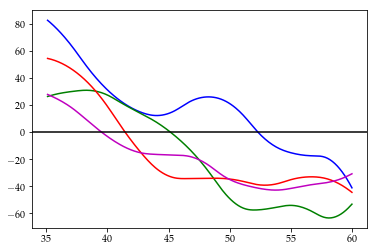

In [33]:
m=0
print m
r=((latns>=35) & (latns<=60))
if (m>=1) & (m<=3) :
    r=((latns>35) & (latns<47))

py.plot(latns[r],SE_change[r,m],'b-')
py.plot(latns[r],MM_change[r,m],'g-')
py.plot(latns[r],TE_change[r,m],'r-')
py.plot(latns[r],NE_change[r,m],'m-')
py.axhline(0,color='k')
py.show()


In [30]:
def plot_monthly_shift_method2(N) :

    zero_div_TE=find_zero(TE_change,N)
    zero_div_SE=find_zero(SE_change,N)
    zero_div_MM=find_zero(MM_change,N)
    zero_div_NE=find_zero(NE_change,N)

    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))

    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y

    TE_obs         = add_month_to_end(zero_div_TE[1:]-zero_div_TE[:-1] )
    SE             = add_month_to_end(zero_div_SE[1:]-zero_div_TE[:-1])
    MM             = add_month_to_end(zero_div_MM[1:]-zero_div_TE[:-1])
    NE             = add_month_to_end(zero_div_NE[1:]-zero_div_TE[:-1])
    TE_calc        = SE+MM+NE
    nonlinear_error= TE_obs-TE_calc
    
    print TE_obs.shape

    from pandas import DataFrame
    df= DataFrame({ "shiftTE_obs": TE_obs, "shiftSE": SE , "shiftMM": MM, "shiftEI": NE, "err": nonlinear_error})
    print df

    fig=py.plot(N*TE_obs,'r.-',label=r'$\Delta\delta\: (\textrm{obs})$',linewidth=3.5,markersize=20)
    fig=py.plot(N*SE,'b.-',label=r'$\Delta\delta_{\textrm{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(N*MM,'g.-',label=r'$\Delta\delta_{\textrm{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(N*NE,'m.-',label=r'$\Delta\delta_{\textrm{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'$\textrm{error}$',linewidth=2.0,markersize=20)
    #py.legend(fontsize=28,loc='best',ncol=2)
    py.axhline(0, color='k',linewidth=1.5)
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    #mticks = [r'$\textrm{J-D}$',r'$\textrm{F-J}$',r'$\textrm{M-F}$',r'$\textrm{A-M}$',r'$\textrm{M-A}$', r'$\textrm{J-M}$',r'$\textrm{J-J}$',r'$\textrm{A-J}$', r'$\textrm{S-A}$', r'$\textrm{O-S}$', r'$\textrm{N-O}$', r'$\textrm{D-N}$', r'$\textrm{J-D}$']
    py.xlim(0,12)
    py.ylim(-6.95,6.95)
    #py.ylabel(r"\textrm{Poleward\hspace{ 2mm} Shift \hspace{ 2mm}}$(^{o}\:N)$", fontsize=45)
    py.ylabel("deg \\ poleward", fontsize=40)
    if N==1:
        H=" (NH)"
    else :
        H=" (SH)"
    py.title("storm track decomposition - method 2"+H,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    
    make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/position/")
    fig_dest1="/project2/tas1/pragallva/Fall_quarter_2017/figures/position/"
    py.savefig(fig_dest1+'decomp_realqflux'+H+'.pdf')
    py.show()

(13,)
         err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0   0.570823 -1.626618 -0.506076 -1.560398    -3.122270
1  -0.152462 -0.117719 -1.339625  2.463577     0.853770
2  -0.985432  1.366973  0.331737 -2.357313    -1.644035
3   1.549182  0.485615 -2.253014  1.241614     1.023397
4  -0.178852  0.803890 -1.437832  0.668620    -0.144174
5   0.976570 -0.017246 -1.164171  2.492844     2.287996
6  -0.829919 -0.681904  0.105574  6.224011     4.817762
7   0.464610  0.035809  0.678261 -1.111096     0.067585
8  -2.052247 -1.549318  3.181479 -0.577737    -0.997824
9  -0.923846 -0.917208  2.900327 -3.773260    -2.713987
10  0.288528 -1.822109  0.347174  0.965933    -0.220474
11  0.371761 -0.361532  1.688221 -1.906198    -0.207749
12  0.570823 -1.626618 -0.506076 -1.560398    -3.122270


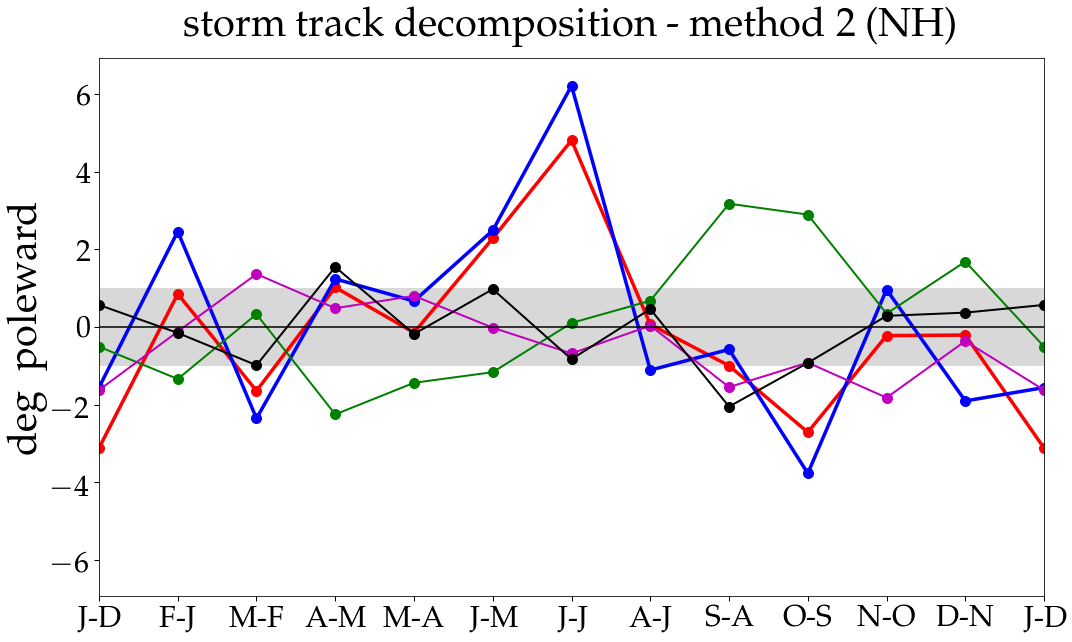

In [31]:
plot_monthly_shift_method2(1)

(13,)
         err   shiftEI   shiftMM   shiftSE  shiftTE_obs
0   0.258216  0.852408  1.676827 -0.801239     1.986213
1   0.005107 -0.436747 -0.218236  0.326318    -0.323558
2   0.097289 -0.726650 -0.119636 -0.087806    -0.836804
3  -0.100649  0.105919 -0.675014 -0.632888    -1.302632
4   0.033563 -0.106445 -0.202343  0.204342    -0.070883
5  -0.095764  0.622303 -0.611670  0.057289    -0.027843
6   0.082788  0.486193 -0.787278  0.675023     0.456726
7   0.116414 -0.108978  0.437513 -0.733817    -0.288868
8   0.035734 -0.412686  0.074130  0.076610    -0.226211
9  -0.046003 -0.184134 -0.767633  0.130922    -0.866847
10  0.007468  0.335598 -0.094406 -0.331031    -0.082370
11 -0.088834 -0.587298  1.754886  0.504324     1.583078
12  0.258216  0.852408  1.676827 -0.801239     1.986213


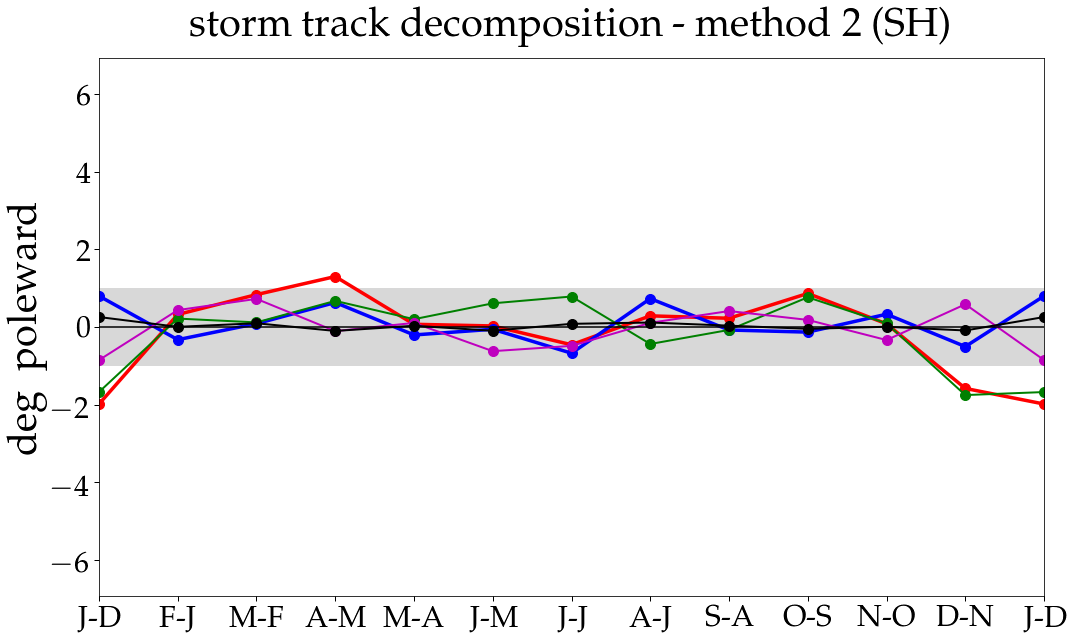

In [32]:
plot_monthly_shift_method2(-1)

In [307]:
n=50
v = np.linspace(-180, 180, n, endpoint=True)

%matplotlib inline
def plot_div() :
    
    fig=py.figure(figsize=(20, 10))
    py.suptitle(title+r" $Wm^{-2}$",fontsize=35,y=1.005)
           
    py.subplot(221)
    b = py.contourf(range(13),latns,add(NE), v, cmap=BuRd); 
    # py.colorbar()
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D']
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-80,80)
    py.title(r'$F_{NE}$',fontsize=30)

    py.subplot(222)
    b = py.contourf(range(13),latns,add(div['MM']), v, cmap=BuRd); 
    # py.colorbar()
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D']
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-80,80)
    py.title(r'$F_{MM}$',fontsize=30)

    py.subplot(223)
    b = py.contourf(range(13),latns,add(div['SE']), v, cmap=BuRd); 
    # py.colorbar()
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D']
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-80,80)
    py.title(r'$F_{SE}$',fontsize=30)

    py.subplot(224)
    b = py.contourf(range(13),latns,add(div['TE']), v, cmap=BuRd); 
    # py.colorbar()
    py.ylim(-80,80)
    #py.plot(range(13),add2(zero_F_TE_N[:-1]),'ro-',lw=5.8,ms=10)
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D']
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(r'$F_{TE}$',fontsize=30)

    py.tight_layout()
    py.savefig(fig_dest+title+'_div.pdf')
    print fig_dest+title+'_div.pdf'
    #py.show()

# plot_div()

NE=flux['TOA_d']+flux['SFC_u']-flux['dhdt']
NE1=flux['SE']+flux['MM']+flux['TE']
latns=flux['latn']
latnr=flux['latnr']

title='ok'
def plot_flux() :
    
    v = np.arange(-15, 15.5, 0.5)
    m=range(13)
    fig=py.figure(figsize=(20, 10))
    py.suptitle(title+" (PW)",fontsize=35,y=1.005)
           
    py.subplot(221)
    b = py.contourf(range(13),latnr,add(NE), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(m,latnr,add(NE),v, colors='k',linewidths=1.0);
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=18)
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-80,80)
    py.title('NE',fontsize=30)

    py.subplot(222)
    b = py.contourf(range(13),latns,add(flux['MM']), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(m,latns,add(flux['MM']),v, colors='k',linewidths=1.0);
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=18)
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-80,80)
    py.title('MM',fontsize=30)

    py.subplot(223)
    b = py.contourf(range(13),latns,add(flux['SE']), v, cmap=BuRd); 
    c=py.contour(m,latns,add(flux['SE']),v, colors='k',linewidths=1.0);
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=18)
    # py.colorbar()
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-80,80)
    py.title('SE',fontsize=30)

    py.subplot(224)
    b = py.contourf(range(13),latns,add(flux['TE']), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(m,latns,add(flux['TE']),v, colors='k',linewidths=1.0);
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=18)
    py.ylim(-80,80)
    #py.plot(range(13),add2(zero_F_TE_N[:-1]),'ro-',lw=5.8,ms=10)
    py.xticks((m), (mticks),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title('TE',fontsize=30)

    py.subplots_adjust(left=0.12, right=0.95, top=0.92, bottom=0.010)
    #py.savefig(fig_dest+title+'_flux.pdf')
    print fig_dest+title+'_flux.pdf'
    #py.show()
    
plot_flux()

TypeError: list indices must be integers, not str